# Задание 1 

Исследуйте, как объем обучающей выборки и количество тестовых данных, влияет на точность классификации или на вероятность ошибочной классификации в примере крестики-нолики и примере о спаме e-mail сообщений.

## Библиотеки

In [1]:
import pandas as pd

import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.datasets import fetch_openml # набор данных о спаме из sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

import seaborn as sns
import matplotlib.pyplot as plt

## Крестики-нолики

Обучающее множество: Tic Tac Toe (крестики-нолики)
"x" начинает первым. Цель: "победа x"
Признаки (категориальные – 3 значения):
1. top-left-square: {x,o,b} 
2. top-middle-square: {x,o,b} 
3. top-right-square: {x,o,b} 
4. middle-left-square: {x,o,b} 
5. middle-middle-square: {x,o,b} 
6. middle-right-square: {x,o,b} 
7. bottom-left-square: {x,o,b} 
8. bottom-middle-square: {x,o,b} 
9. bottom-right-square: {x,o,b}

3 класса: {positive,negative}


In [2]:
with open("Tic_tac_toe.txt", "r") as file:
    lines = file.readlines()
print(len(lines))
    
# Создание списка признаков и меток
features = []
labels = []
for line in lines:
    data = line.strip().split(",")
    features.append(data[:-1])
    labels.append(data[-1])

char_to_int = {"x": 0, "o": 1, "b": 2}
features_numeric = [[char_to_int[char] for char in row] for row in features]

for test_size in range(1, 10):
    test_size /= 10
    X_train, X_test, y_train, y_test = train_test_split(features_numeric, labels, test_size=test_size, random_state=12345)

    k = 37  # Количество соседей
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)

    predictions = model.predict(X_test)

    accuracy = accuracy_score(y_test, predictions)
    print(f"Точность модели для тестовой выборки {int(test_size*100)}% от всего набора данных (k={k}): {accuracy}")
    
# # Построение матрицы ошибок
# conf_matrix = confusion_matrix(y_test, predictions)

# plt.figure(figsize=(8, 6))
# sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', 
#             xticklabels=["Negative", "Positive"],
#             yticklabels=["Negative", "Positive"])
# plt.xlabel('Предсказанные значения')
# plt.ylabel('Фактические значения')
# plt.title('Матрица ошибок')
# plt.show()

958
Точность модели для тестовой выборки 10% от всего набора данных (k=37): 0.8541666666666666
Точность модели для тестовой выборки 20% от всего набора данных (k=37): 0.8072916666666666
Точность модели для тестовой выборки 30% от всего набора данных (k=37): 0.8194444444444444
Точность модели для тестовой выборки 40% от всего набора данных (k=37): 0.7786458333333334
Точность модели для тестовой выборки 50% от всего набора данных (k=37): 0.7223382045929019
Точность модели для тестовой выборки 60% от всего набора данных (k=37): 0.6939130434782609
Точность модели для тестовой выборки 70% от всего набора данных (k=37): 0.6944858420268256
Точность модели для тестовой выборки 80% от всего набора данных (k=37): 0.6740547588005215
Точность модели для тестовой выборки 90% от всего набора данных (k=37): 0.6442641946697567


## Спам

Обучающее множество: Данные о спаме e-mail сообщений
Данные собраны Hewlett-Packard Labs, которая классифицировала 4601 e-mail сообщений как спам или не спам. 57 признаков, содержащих частоты определенных слов, соответствующих названию признака и букв в сообщениях. Данные содержат 2788 e-mail сообщений, классифицируемых как "не спам" (0) and 1813 сообщений, классифицируемых как "спам" (1). Часть признаков – частоты определенных слов, соответствующих названию признака. Часть признаков связана с числом заглавных букв в письме. 


In [3]:
# Загрузка встроенного набора данных Spambase
data = fetch_openml(data_id=44)

df = pd.DataFrame(data.data, columns=data.feature_names)
df['label'] = data.target

X = df.drop(columns=["label"])  # Признаки
y = df["label"]  # Метки классов
print(len(y))

for test_size in range(20, 201, 20):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=12345)

    k = 67  # Количество соседей
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)

    predictions = model.predict(X_test)

    accuracy = accuracy_score(y_test, predictions)
    print(f"Точность модели для тестовой выборки {test_size} элементов от всего набора данных: {accuracy}")

# # Построение матрицы ошибок
# conf_matrix = confusion_matrix(y_test, predictions)

# # Визуализация теплокарты матрицы ошибок
# plt.figure(figsize=(8, 6))
# sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', 
#             xticklabels=["Не спам", "Спам"],
#             yticklabels=["Не спам", "Спам"])
# plt.xlabel('Предсказанные значения')
# plt.ylabel('Фактические значения')
# plt.title('Матрица ошибок')
# plt.show()

/usr/local/Cellar/jupyterlab/3.6.1/libexec/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


4601
Точность модели для тестовой выборки 20 элементов от всего набора данных: 0.9
Точность модели для тестовой выборки 40 элементов от всего набора данных: 0.875
Точность модели для тестовой выборки 60 элементов от всего набора данных: 0.75
Точность модели для тестовой выборки 80 элементов от всего набора данных: 0.7125
Точность модели для тестовой выборки 100 элементов от всего набора данных: 0.72
Точность модели для тестовой выборки 120 элементов от всего набора данных: 0.7166666666666667
Точность модели для тестовой выборки 140 элементов от всего набора данных: 0.7142857142857143
Точность модели для тестовой выборки 160 элементов от всего набора данных: 0.71875
Точность модели для тестовой выборки 180 элементов от всего набора данных: 0.7222222222222222
Точность модели для тестовой выборки 200 элементов от всего набора данных: 0.72


# Задание 2

Постройте классификатор для обучающего множества Glass, данные которого характеризуются 10-ю признаками: 
  1. Id number: 1 to 214; 2. RI: показатель преломления; 3. Na: сода (процент содержания в соотвествующем оксиде); 4. Mg; 5. Al; 6. Si; 7. K; 8. Ca; 9. Ba; 10. Fe.
 
Классы характеризуют тип стекла:

  (1) окна зданий, плавильная обработка
  
  (2) окна зданий, не плавильная обработка
  
  (3) автомобильные окна, плавильная обработка
  
  (4) автомобильные окна, не плавильная обработка (нет в базе)
  
  (5) контейнеры
  
  (6) посуда
  
  (7) фары
  
Посмотрите заголовки признаков и классов. Перед построением классификатора необходимо также удалить первый признак Id number, который не несет никакой информационной нагрузки. Это выполняется командой glass <- glass[,-1].

In [4]:
glass = pd.read_csv('glass.csv')
glass = glass.drop(columns=['Id'])

X = glass.drop(columns=['Type of glass'])
y = glass['Type of glass']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)

Постройте графики зависимости ошибки классификации от значения k и от типа ядра. 

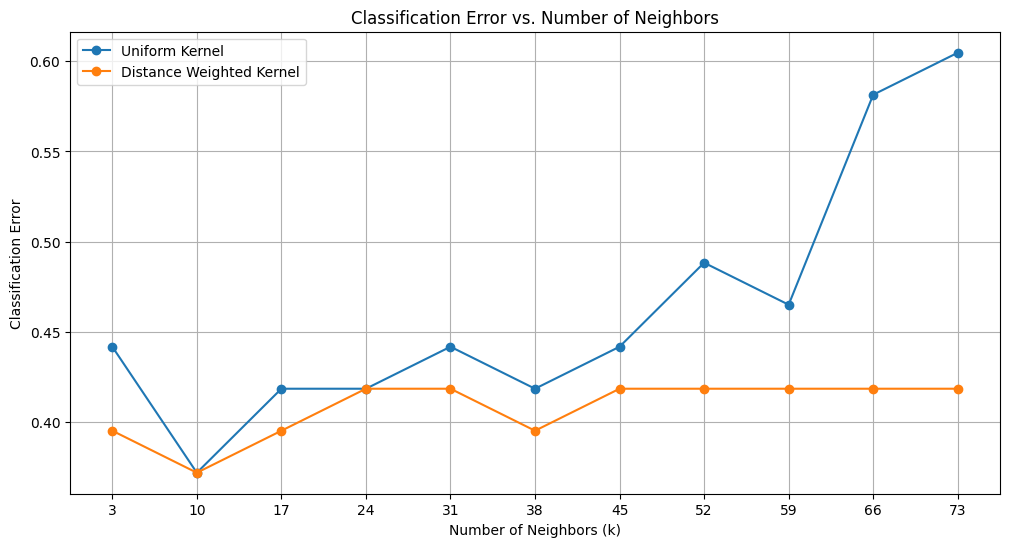

In [5]:
errors = []

k_values = range(3, 80, 7)  # значения k
kernel_types = ['uniform', 'distance']

for kernel in kernel_types:
    error_rates = []
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k, weights=kernel)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        error = 1 - accuracy_score(y_test, y_pred)
        error_rates.append(error)
    errors.append(error_rates)

# Построение графиков ошибок
plt.figure(figsize=(12, 6))
plt.plot(k_values, errors[0], marker='o', label='Uniform Kernel')
plt.plot(k_values, errors[1], marker='o', label='Distance Weighted Kernel')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Classification Error')
plt.title('Classification Error vs. Number of Neighbors')
plt.xticks(k_values)
plt.legend()
plt.grid()
plt.show()

Исследуйте, как тип метрики расстояния (параметр distance) влияет на точность классификации.

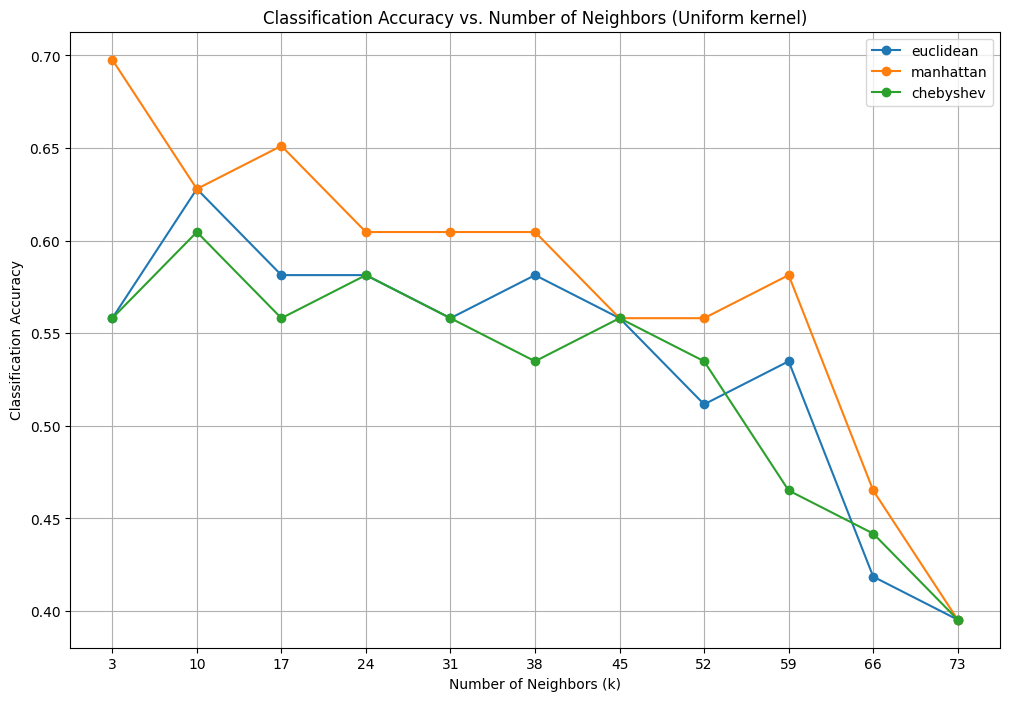

In [6]:
k_values = range(3, 80, 7)  # Значения k
metrics = ['euclidean', 'manhattan', 'chebyshev']

# Построение графиков
plt.figure(figsize=(12, 8))

for metric in metrics:
    accuracy_values = []
    for k in k_values:
        model = KNeighborsClassifier(n_neighbors=k, metric=metric, weights='uniform')
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_values.append(accuracy)
    plt.plot(k_values, accuracy_values, marker='o', label=metric)

plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Classification Accuracy')
plt.title('Classification Accuracy vs. Number of Neighbors (Uniform kernel)')
plt.xticks(np.arange(3, 80, step=7))
plt.legend()
plt.grid()
plt.show()

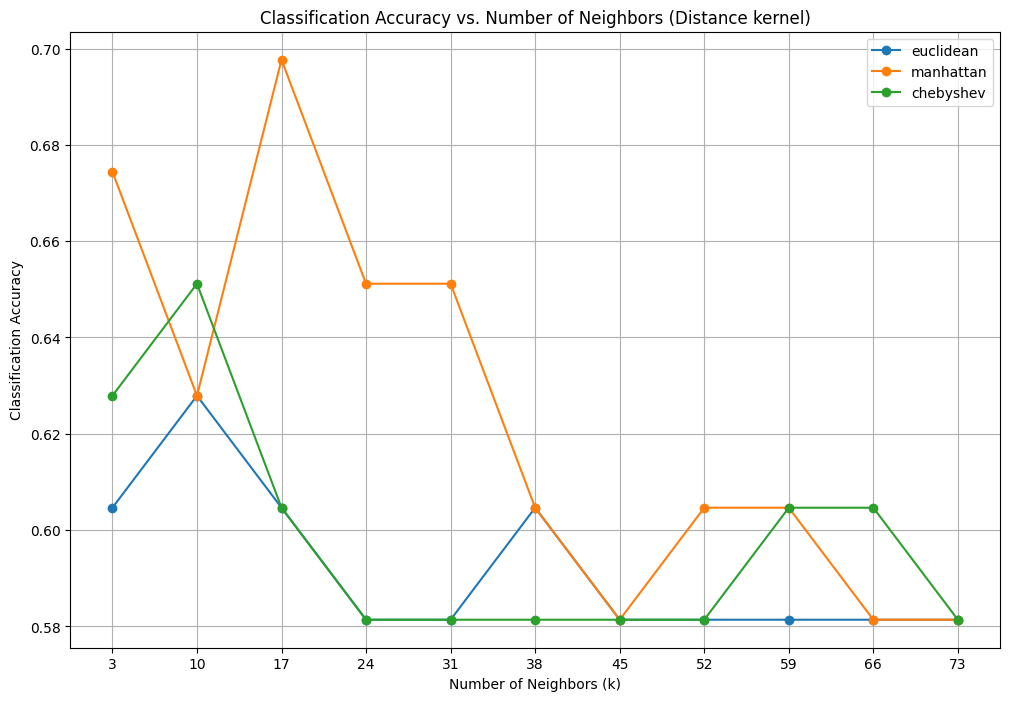

In [7]:
# Построение графиков
plt.figure(figsize=(12, 8))

for metric in metrics:
    accuracy_values = []
    for k in k_values:
        model = KNeighborsClassifier(n_neighbors=k, metric=metric, weights='distance')
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_values.append(accuracy)
    plt.plot(k_values, accuracy_values, marker='o', label=metric)

plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Classification Accuracy')
plt.title('Classification Accuracy vs. Number of Neighbors (Distance kernel)')
plt.xticks(np.arange(3, 80, step=7))
plt.legend()
plt.grid()
plt.show()

Определите, к какому типу стекла относится экземпляр с характеристиками

RI =1.516 Na =11.7 Mg =1.01 Al =1.19 Si =72.59 K=0.43 Ca =11.44 Ba =0.02 Fe =0.1 

In [8]:
# Новый экземпляр стекла для классификации
new_glass = np.array([1.516, 11.7, 1.01, 1.19, 72.59, 0.43, 11.44, 0.02, 0.1]).reshape(1, -1)

# Лучшая модель для предсказания класса (с наименьшей ошибкой)
best_k = k_values[np.argmin(errors[0])]
best_knn = KNeighborsClassifier(n_neighbors=best_k, weights='uniform')
best_knn.fit(X_train, y_train)

predicted_class = best_knn.predict(new_glass)

print(f'Предсказанный класс стекла: {predicted_class[0]}')
print(best_k)

Предсказанный класс стекла: 5
10


/usr/local/Cellar/jupyterlab/3.6.1/libexec/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Определите, какой из признаков оказывает наименьшее влияние на определение класса путем последовательного исключения каждого признака. 

In [9]:
# Создание пустого списка для сохранения важности признаков
feature_importances = []

# Перебор признаков и исключение каждого из них
for i in range(X.shape[1]):
    X_temp = np.delete(X.values, i, axis=1)  # удаление текущего признака
    X_train_temp, X_test_temp, _, _ = train_test_split(X_temp, y, test_size=0.2, random_state=12345)
    knn_temp = KNeighborsClassifier(n_neighbors=best_k, weights='uniform')
    knn_temp.fit(X_train_temp, y_train)
    accuracy_temp = accuracy_score(y_test, knn_temp.predict(X_test_temp))
    importance = accuracy_temp - accuracy  # изменение в точности после исключения признака
    feature_importances.append(importance)

# Определение наименее важного признака
least_important_feature_index = np.argmin(feature_importances)
least_important_feature_name = glass.columns[least_important_feature_index]

print(f'Наименее важный признак: {least_important_feature_name}')


Наименее важный признак: Na


# Задание 3

Для построения классификатора используйте заранее сгенерированные обучающие и тестовые выборки, хранящиеся в файлах svmdata4.txt, svmdata4test.txt. Найдите оптимальное значение k, обеспечивающее наименьшую ошибку классификации.

Посмотрите, как выглядят данные на графике, используя функцию

plot(mydata.train$X1, mydata.train$X2, pch=21, bg=c("red","blue") [unclass(mydata.train$Colors)],  main="My train data")

In [10]:
train_data = pd.read_csv("svmdata4.txt", delimiter="\t")
test_data = pd.read_csv("svmdata4test.txt", delimiter="\t")

X_train = train_data[["X1", "X2"]]
y_train = train_data["Colors"]
X_test = test_data[["X1", "X2"]]
y_test = test_data["Colors"]

In [11]:
# Поиск оптимального значения k с использованием кросс-валидации
param_grid = {'n_neighbors': np.arange(3, 21, 2)}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5) # 5 фолдов
grid_search.fit(X_train, y_train)
optimal_k = grid_search.best_params_['n_neighbors']

# Построение классификатора с оптимальным значением k
knn_classifier = KNeighborsClassifier(n_neighbors=optimal_k)
knn_classifier.fit(X_train, y_train)

y_pred = knn_classifier.predict(X_test)

accuracy = np.mean(y_pred == y_test)

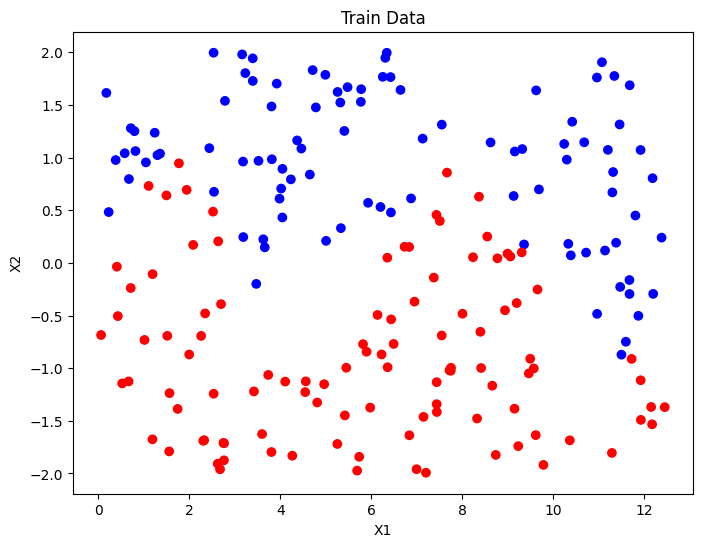

Оптимальное значение k: 3
Точность на тестовом наборе: 0.94


In [12]:
# Построение графика данных обучающего набора
plt.figure(figsize=(8, 6))
colors = np.where(y_train == 'red', 'red', 'blue')
plt.scatter(train_data["X1"], train_data["X2"], c=colors)
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Train Data")
plt.show()

print(f"Оптимальное значение k: {optimal_k}")
print(f"Точность на тестовом наборе: {accuracy:.2f}")

# Задание 4

Разработать классификатор на основе метода ближайших соседей для данных Титаник (Titanic dataset)

Исходные обучающие данные для классификации – в файле Titanic_train.csv

Данные для тестирования – в файле Titanic_test.csv


In [13]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [14]:
# Подготовка данных
def preprocess_data(data):
    data.drop(columns=["Name", "Ticket", "Cabin", "PassengerId"], inplace=True)
    data["Age"].fillna(data["Age"].mean(), inplace=True)
    data["Fare"].fillna(data["Fare"].mean(), inplace=True)
    data["Embarked"].fillna(data["Embarked"].mode()[0], inplace=True)  # Заполняем отсутствующие значения в Embarked модой
    
    label_encoders = {}
    categorical_features = ["Sex", "Embarked"]
    for feature in categorical_features:
        le = LabelEncoder()
        data[feature] = le.fit_transform(data[feature])
        label_encoders[feature] = le
    
    return data

In [15]:
train_data_preprocessed = preprocess_data(train_data)
X_train = train_data_preprocessed.drop(columns=["Survived"])

k = 7  # Количество соседей
classifier = KNeighborsClassifier(n_neighbors=k)
classifier.fit(X_train, train_data_preprocessed["Survived"])

KNeighborsClassifier(n_neighbors=7)

In [16]:
test_data_preprocessed = preprocess_data(test_data)

predictions = classifier.predict(test_data_preprocessed)

In [17]:
survived_count = sum(predictions)
died_count = len(predictions) - survived_count

print("Количество выживших:", survived_count)
print("Количество погибших:", died_count)

Количество выживших: 147
Количество погибших: 271
